In [93]:
#data analysis and wrangling 
import numpy as np
import pandas as pd 

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt



In [94]:
#load data
customerdata = pd.read_csv('/Users/leesunny/Downloads/QVI_purchase_behaviour.csv')
transactiondata = pd.read_csv('/Users/leesunny/Downloads/QVI_transaction_data.csv')

In [95]:
#view purchase data
customerdata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [96]:
len(customerdata)

72637

In [97]:
customerdata['LYLTY_CARD_NBR'].nunique()

72637

In [98]:
customerdata['LIFESTAGE'].nunique()

7

In [99]:
customerdata['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [100]:
customerdata['LIFESTAGE'].value_counts().sort_values(ascending=False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

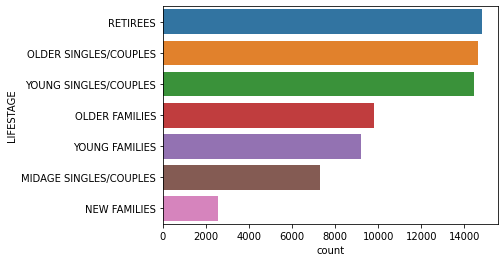

In [101]:
plot = sns.countplot(y=customerdata['LIFESTAGE'], order = customerdata['LIFESTAGE'].value_counts().index)
plt.savefig('plot.png')

In [102]:
customerdata['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

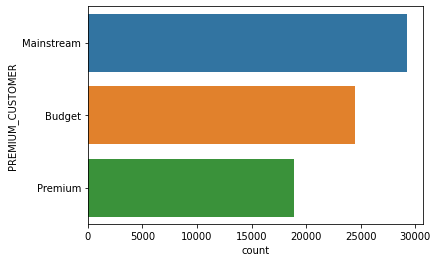

In [103]:
sns.countplot(y=customerdata['PREMIUM_CUSTOMER'], order = customerdata['PREMIUM_CUSTOMER'].value_counts().index)
plt.savefig('premium_customers')

In [104]:
customerdata['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [105]:
#--CUSTMERDATA--

In [106]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [107]:
transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [108]:
#turn excel serial date to datetime

import datetime
def xldate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days=(xlserialdate - 1 ))
    else:
        delta_in_days = datetime.timedelta(days=(xlserialdate - 2 ))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [109]:
transactiondata['DATE'] = transactiondata['DATE'].apply(xldate_to_datetime)

In [110]:
transactiondata['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [111]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [112]:
#extract weights out of prod_name
transactiondata['PACK_SIZE'] = transactiondata['PROD_NAME'].str.extract("(\d+)")
transactiondata['PACK_SIZE'] = pd.to_numeric(transactiondata['PACK_SIZE'])
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [113]:
#create text cleaning function for prod_name
import re
def clean_text(text):
    text = re.sub('[&/]', ' ', text)
    text = re.sub('\d\w*', ' ', text)
    return text 
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(clean_text)

In [114]:
#most common words by counting the number of times a word appears
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

wordfrequency = FreqDist(transactiondata['PROD_NAME'])
freq_df = pd.DataFrame(list(wordfrequency.items()), columns = ["word", "frequency"]).sort_values(by='frequency', ascending=False)
freq_df.head()                                                                                             

,word,frequency
39,Kettle Mozzarella Basil Pesto,3304
4,Kettle Tortilla ChpsHny Jlpno Chili,3296
56,Cobs Popd Swt Chlli Sr Cream Chips,3269
93,Tyrrells Crisps Ched Chives,3268
60,Cobs Popd Sea Salt Chips,3265


In [115]:
#drop rows with 'salsa' in 'PROD_NAME'
transactiondata = transactiondata[transactiondata['PROD_NAME'] != "salsa"]

In [116]:
#find out who bought 200 packets
transactiondata['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [117]:
transactiondata.loc[transactiondata['PROD_QTY'] == 200, :]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [118]:
transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]
#ONLY BOUGHT TWICE
#bought them for commercial purpose 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [119]:
#count the number of dates 
transactiondata['DATE'].nunique()

364

In [120]:
#find the missing date 
#chirsmas day closed 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(transactiondata['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [121]:
a = pd.pivot_table(transactiondata, values = 'TOT_SALES', index = 'DATE', aggfunc='sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [122]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
b

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [123]:
#graph of transaction overtime 

import matplotlib.dates as mdates

timeline = c.index
graph = c['TOT_SALES']

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(timeline, graph)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("Total Sales from July 2018 to June 2019")
plt.xlabel('Time')
plt.ylabel('Total sales')

plt.show()

NameError: name 'c' is not defined

In [ ]:
# look at the december at individual days
c_december = c[(c.index<"2019-01-01") & (c.index>"2018-11-30")]
c_december.head()

NameError: name 'c' is not defined

In [127]:
plt.figure(figsize = (20, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('total sales')
plt.title('total sales in december')

# increase in sales occurs in the lead-up to Christmas

NameError: name 'c_december' is not defined

<Figure size 1440x360 with 0 Axes>

In [128]:
#plot histogram of pack_size
transactiondata['PACK_SIZE'].head()

0    175
1    175
2    170
3    175
4    150
Name: PACK_SIZE, dtype: int64

In [129]:
transactiondata['PACK_SIZE'].unique()

array([175, 170, 150, 300, 330, 210, 270, 220, 125, 110, 134, 380, 180,
       165, 135, 250, 200, 160, 190,  90,  70])

<AxesSubplot:>

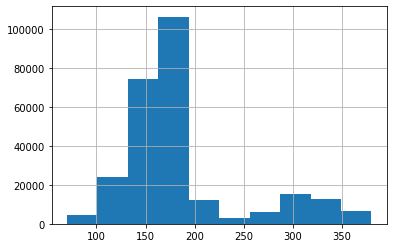

In [130]:
#look at the pack size distribution 
transactiondata['PACK_SIZE'].hist()

In [131]:
#extract brand name on prod_name
transactiondata['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt 
1                    CCs Nacho Cheese     
2      Smiths Crinkle Cut  Chips Chicken  
3      Smiths Chip Thinly  S Cream Onion  
4    Kettle Tortilla ChpsHny Jlpno Chili  
Name: PROD_NAME, dtype: object

In [132]:
part = transactiondata['PROD_NAME'].str.partition()
transactiondata['BRAND'] = part[0]
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [134]:
transactiondata['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'GrnWves', 'Tyrrells',
       'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Sunbites'], dtype=object)

In [133]:
#rename brand names

transactiondata['BRAND'].replace('Ncc', 'Natural', inplace = True)
transactiondata['BRAND'].replace('Ccs', 'CCS', inplace = True)
transactiondata['BRAND'].replace('Smith', 'Smiths', inplace = True)
transactiondata['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transactiondata['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transactiondata['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transactiondata['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transactiondata['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transactiondata['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transactiondata['BRAND'].unique()


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'GrnWves', 'Tyrrells',
       'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Sunbites'], dtype=object)

In [135]:
#top brand 
transactiondata.groupby('BRAND').TOT_SALES.sum().sort_values(ascending=False)

BRAND
Kettle           390239.8
Doritos          241890.9
Smiths           224660.2
Pringles         177655.5
Infuzions         99047.6
Old               90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     30091.5
CCs               18078.9
Cheetos           16884.5
Woolworths        13454.1
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

In [136]:
#conbine 2 dataset
transactiondata.shape

(264836, 10)

In [137]:
customerdata.shape

(72637, 3)

In [139]:
combinedata = pd.merge(transactiondata, customerdata)
combinedata.shape

(264836, 12)

In [140]:
combinedata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [141]:
#data analysis on customer segments 
#total sales by 'premium_customer' and 'lifestage'

sales = pd.DataFrame(combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.sort_values(by='TOT_SALES', ascending = False, inplace=True)
sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          168363.25
Mainstream       YOUNG SINGLES/COUPLES   157621.60
                 RETIREES                155677.05
Budget           YOUNG FAMILIES          139345.85
                 OLDER SINGLES/COUPLES   136769.80
Mainstream       OLDER SINGLES/COUPLES   133393.80
Premium          OLDER SINGLES/COUPLES   132263.15
Budget           RETIREES                113147.80
Mainstream       OLDER FAMILIES          103445.55
Premium          RETIREES                 97646.05
Mainstream       YOUNG FAMILIES           92788.75
                 MIDAGE SINGLES/COUPLES   90803.85
Premium          YOUNG FAMILIES           84025.50
                 OLDER FAMILIES           81958.40
Budget           YOUNG SINGLES/COUPLES    61141.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 YOUNG SINGLES/COUPLES    41642.10
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
Mainstream       NEW FAMILIES             17013.90
Premium          NEW FAMILIES             11491.10

In [142]:
#number of customers by 'premium_customer' and 'lifestage'

import pandas as pd
customers = pd.DataFrame(combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779

In [143]:
#Higher sales may also be driven by more units of chips being bought per customer. 
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

avg_units = combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

Average Unit per Customer
PREMIUM_CUSTOMER LIFESTAGE                                
Mainstream       OLDER FAMILIES                   9.804309
Premium          OLDER FAMILIES                   9.749780
Budget           OLDER FAMILIES                   9.639572
                 YOUNG FAMILIES                   9.238486
Premium          YOUNG FAMILIES                   9.209207

In [144]:
#Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

avg_price = combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns={'Price per Unit'})
avg_price.sort_values(by='Price per Unit', ascending=False).head()

Price per Unit
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream              4.080079
MIDAGE SINGLES/COUPLES Mainstream              4.000346
NEW FAMILIES           Mainstream              3.939315
                       Budget                  3.936178
RETIREES               Budget                  3.933660

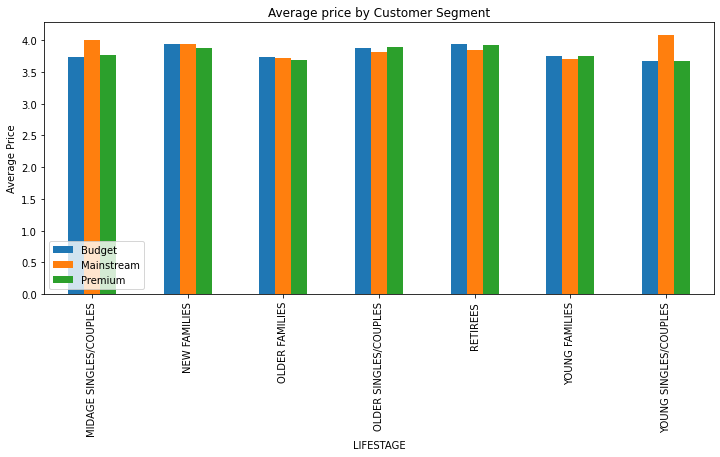

In [146]:
#plot the avg_price
avgpriceplot = pd.DataFrame(combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgpriceplot.unstack().plot(kind='bar', figsize=(12,5), title='Average price by Customer Segment')
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 3)
plt.savefig('avg_price')

In [147]:
#the difference is not large
#perform an independent t-test between mainstream vs premium and budget midage and young singles and couples 
pricePerUnit = combinedata

pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [148]:
#group data into mainstream and non-mainstream

mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']


Text(0.5, 0, 'price per unit')

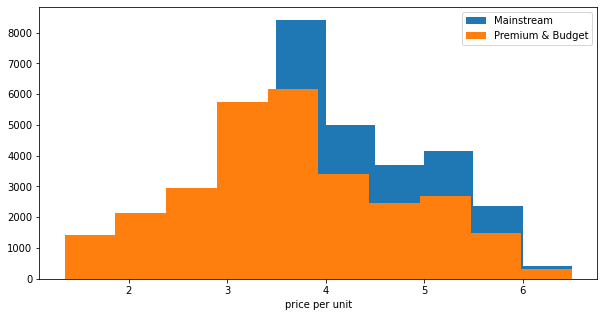

In [149]:
plt.figure(figsize=(10, 5))
plt.hist(mainstream, label='Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('price per unit')

In [150]:
#t-test
import numpy as np
import pandas as pd
from scipy import stats

[np.mean(mainstream), np.mean(nonMainstream)]
stats.ttest_ind(mainstream, nonMainstream)


Ttest_indResult(statistic=40.83413678791155, pvalue=0.0)

In [151]:
# Deep dive into specific customer segments for insights
# target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. 
target = combinedata.loc[(combinedata['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combinedata['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nontarget = combinedata.loc[(combinedata['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (combinedata['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
237702,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237703,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
237704,2019-05-02,1,1020,28,84,GrnWves Plus Btroot Chilli Jam,1,3.1,180,GrnWves,YOUNG SINGLES/COUPLES,Mainstream,3.1
237705,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237706,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [152]:
#affinity to brand

#target
targetbrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetsum = targetbrand['PROD_QTY'].sum()
targetbrand['target brand affinity'] = targetbrand['PROD_QTY'] / targetsum
targetbrand = pd.DataFrame(targetbrand.groupby('BRAND')['target brand affinity'].sum())

#nontarget
nontargetbrand = nontarget.loc[:, ['BRAND', 'PROD_QTY']]
nontargetsum = nontargetbrand['PROD_QTY'].sum()
nontargetbrand['Non-Target Brand Affinity'] = nontargetbrand['PROD_QTY'] / nontargetsum
nontargetbrand = pd.DataFrame(nontargetbrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [153]:
#merge two dataframe together 
brand_proportions = pd.merge(targetbrand, nontargetbrand, left_index = True, right_index = True)
brand_proportions.head()

,target brand affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002744,0.006085
CCs,0.010484,0.017167
Cheetos,0.007533,0.010944
Cheezels,0.016851,0.017594
Cobs,0.041856,0.035786


In [154]:
brand_proportions['Affinity to Brand'] = brand_proportions['target brand affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,target brand affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.029587,0.023934,1.236200
Twisties,0.043306,0.035306,1.226610
Kettle,0.185649,0.155024,1.197555
Tostitos,0.042581,0.035694,1.192954
Old,0.041598,0.034882,1.192534
Pringles,0.111980,0.094107,1.189921
Grainwaves,0.027309,0.023167,1.178769
Cobs,0.041856,0.035786,1.169640
Doritos,0.122877,0.106542,1.153328


In [156]:
#inclusion : more likelt to purchase the tyrrells chips compared to others 


In [158]:
#affinity to pack size 

#target
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nontarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())


In [159]:
# Merge the two dataframes 

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PACK_SIZE,,
70,0.002847,0.005848
90,0.005954,0.011739
110,0.099658,0.083371
125,0.002821,0.005562
134,0.111980,0.094107


In [160]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_SIZE,,,
270,0.029846,0.023333,1.279102
330,0.057465,0.047444,1.211233
110,0.099658,0.083371,1.195364
380,0.030156,0.025343,1.189936
134,0.111980,0.094107,1.189921
210,0.027309,0.023167,1.178769
135,0.013849,0.012036,1.150626
250,0.013460,0.011972,1.124304
170,0.075740,0.074782,1.012817


In [161]:
combinedata.loc[combinedata['PACK_SIZE'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

In [ ]:
#conclusion
#1.sales are highest(budget,older families),(mainstream,young singles/couples),(mainstream,retirees)
#2.(Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments
#3.(Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips 
#4.They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population